# Gauss Data How To
MI udtryk:
\begin{align}
    I(X;Y)=\dfrac{d}{2}\log_2\left( 1 + \dfrac{\sigma_x^2}{\sigma_y^2} \right).
\end{align}

Fra Dave Moore's [hjemmeside](http://davmre.github.io/blog/statistics/2015/03/27/gaussian_quotient):

Lad
\begin{align}
    X&\sim\mathcal{N}\left(x;\ a,\ A \right) \\
    Y&\sim\mathcal{N}\left(y;\ b,\ B \right)
\end{align}
så er kvoetienten udtrykt ved:
\begin{align}
    \dfrac{\mathcal{N}\left(x;\ a,\ A \right)}{\mathcal{N}\left(y;\ b,\ B \right)} = \beta \mathcal{N}\left(z;\ d,\ D \right)
\end{align}
hvor 
\begin{align}
    D&=(A^{-1}-B^{-1})^{-1} \\
    d&=D(A^{-1}a-B^{-1}b) \\
    \beta&=\dfrac{|B|}{|B-A|}\left( \mathcal{N}\left( a;\ b,\ B-A \right) \right)^{-1}
\end{align}

skulle man jo have troet, men Dave Moore er fuld af lort
```
N = int(10e5)

a, A = 100, 5
b, B = 100, 100

D = 1/(A**-1 - B**-1)
d = D*(A**-1 * a - B**-1 * b)
beta = (B / (B-A)) / norm.pdf(a, loc=b, scale=np.sqrt(B-A))

x = np.linspace(80, 120, 1000)
y_pdf = beta * norm.pdf(x, loc=b, scale=np.sqrt(D))
test_pdf = np.random.normal(a, np.sqrt(A), N) / np.random.normal(b, np.sqrt(B), N)

plt.hist(test_pdf, bins=50, alpha=0.8, label="Numerical Test", density=True)
# plt.plot(x, y_pdf, label="Theoretical", alpha=0.8, ls="--")

plt.legend()
plt.show()
```
Ovenstående viser at deres udledninger er forkerte

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [41]:
N = int(10e5)

m1, c1 = 50 * np.ones(2), np.array([[1, 0.2], [0.2, 1]])
m2, c2 = 100 * np.ones(2), np.eye(2)

c3 = np.linalg.inv(np.linalg.inv(c1) - np.linalg.inv(c2))
m3 = np.linalg.inv(c3) * (m1.T @ np.linalg.inv(c1) - m2.T @ np.linalg.inv(c2))

x = np.linspace(0, 150, int(10e3))

y1_num = np.random.multivariate_normal(m1, c1, N)
y2_num = np.random.multivariate_normal(m2, c2, N)

y_num = y1_num / y2_num

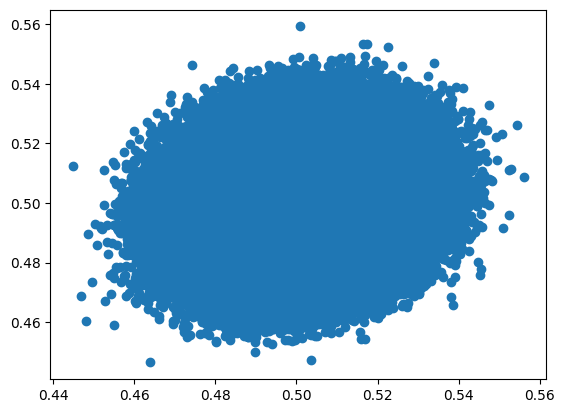

In [44]:
plt.scatter(y_num[:, 0], y_num[:, 1])
